In [2]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
from ipywidgets import interact, interactive, fixed, interact_manual
import contextily as ctx
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Visualizando a Pandemia

## Baixando a Base Cartográfica

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Baixando os dados globais de casos Confirmados

In [67]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed = confirmed.groupby('Country/Region').sum()
confirmed_mundo = pd.merge(world,confirmed, left_on='name', right_on='Country/Region')
confirmed_mundo.to_file('../mapas/confirmados_mundo.gpkg')

In [65]:
conf_US = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
# conf_US.plot(column='3/30/20', legend=True, 
#                      legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'});
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

AttributeError: 'Line2D' object has no property 'column'

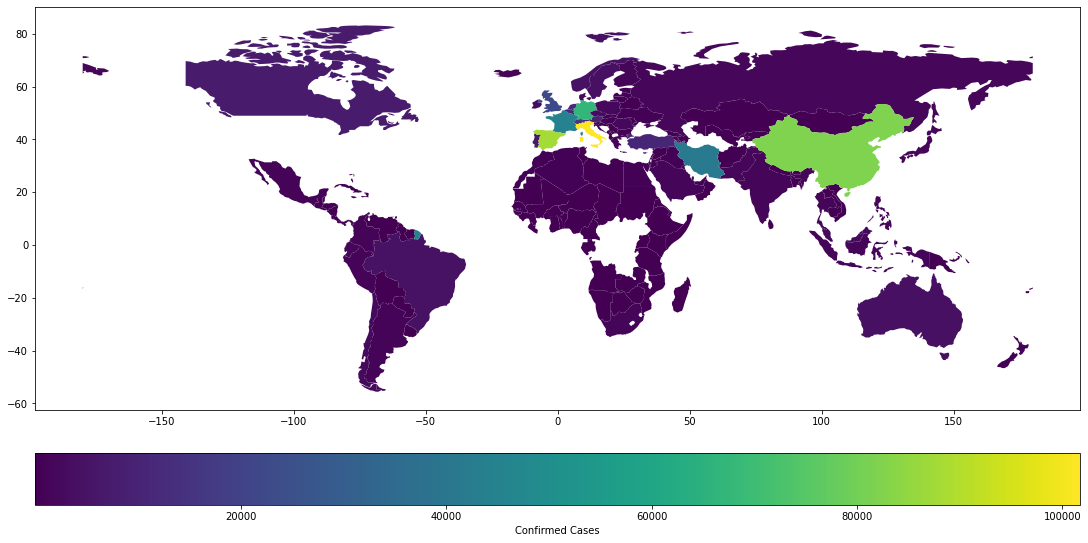

In [60]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
confirmed_mundo.plot(ax=ax,column='3/30/20', legend=True, 
                     legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'});

ax.set_axis_off()

## Baixando os dados globais de mortes pela COVID-19

In [46]:
mortes = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
mortes = mortes.groupby('Country/Region').sum()
mortes

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.4238,-66.5897,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
Vietnam,16.0000,108.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


In [68]:
mortes_mundo = pd.merge(world,mortes, left_on='name', right_on='Country/Region')
mortes_mundo.to_file('../mapas/mortes_mundo.gpkg')

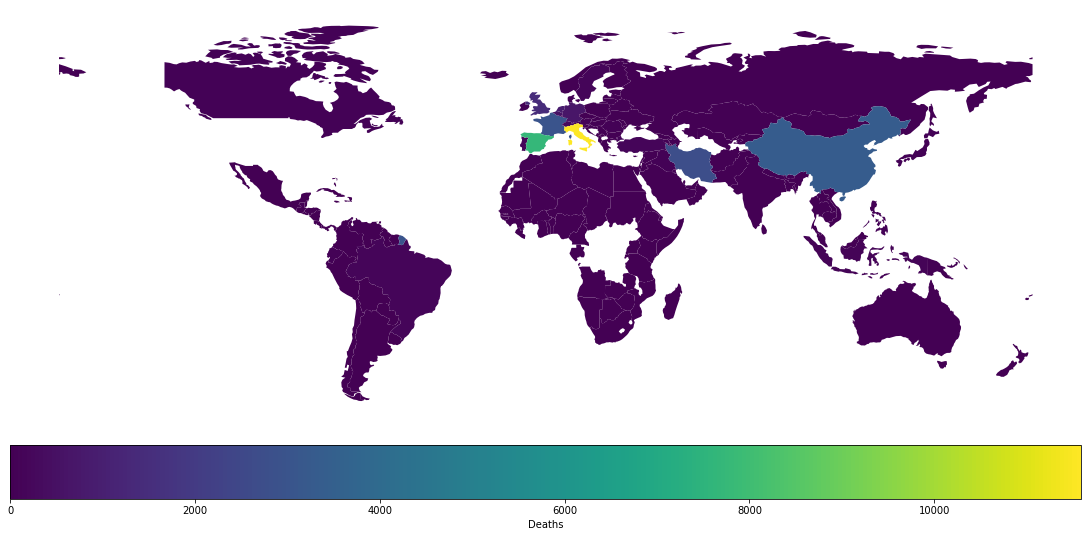

In [48]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
mortes_mundo.plot(ax=ax,column='3/30/20', legend=True,
                 legend_kwds={'orientation':'horizontal', 'label':'Deaths'});
ax.set_axis_off()

In [55]:
from datetime import datetime
start_date = datetime(2020, 1, 22)
end_date = datetime(2020, 3, 30)

dates = pd.date_range(start_date, end_date, freq='D')

options = [date.strftime('%-m/%-d/%y') for date in dates]

selection_slider = widgets.SelectionSlider(
    options=options,
    description='Datas',
    orientation='horizontal',
    layout={'width': '500px'}
)
continent_sel = widgets.Select(
    options=list(set(world.continent))+['Todos'],
    value='Todos',
    # rows=10,
    description='Continentes:',
    disabled=False
)



@interact(date=selection_slider, normalizado=True, continente=continent_sel)
def plot_conf_cases(date, normalizado, continente):
    fig,ax = plt.subplots(1, 1, figsize=(15,15))
    if normalizado:
        if continente == 'Todos':
            dado = 1e5*confirmed_mundo[date]/confirmed_mundo['pop_est']
        else:
            dado = 1e5*confirmed_mundo[confirmed_mundo.continent==continente][date]/confirmed_mundo[confirmed_mundo.continent==continente]['pop_est']
        title = 'Casos confirmados por 100 mil'
    else:
        if continente == 'Todos':
            dado = confirmed_mundo[date]
        else:
            dado = confirmed_mundo[confirmed_mundo.continent==continente][date]
        title = 'Casos confirmados'
    if date in confirmed_mundo.columns:
        if continente == 'Todos':
            confirmed_mundo.plot(ax=ax, column=dado, 
                             alpha=.5, legend=True,
                             legend_kwds={'orientation':'horizontal', 'label':title}
                            );
        else:
            confirmed_mundo[confirmed_mundo.continent==continente].plot(ax=ax, column=dado, 
                             alpha=.5, legend=True,
                             legend_kwds={'orientation':'horizontal', 'label':title}
                            );

    ax.set_title(title)
    ax.set_axis_off()
   

interactive(children=(SelectionSlider(description='Datas', layout=Layout(width='500px'), options=('1/22/20', '…

In [57]:
confirmed_mundo[confirmed_mundo.continent=='North America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Lat,Long,1/22/20,1/23/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",671.7607,-1237.6289,0,0,...,1277,1469,2088,2790,3251,4042,4682,5576,6280,7398
13,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",18.9712,-72.2852,0,0,...,2,2,6,7,8,8,8,8,15,15
15,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",25.0343,-77.3963,0,0,...,4,4,4,5,5,9,10,10,11,14
19,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",23.6345,-102.5528,0,0,...,203,251,316,367,405,475,585,717,848,993
25,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",8.5380,-80.7821,0,0,...,200,313,345,345,443,558,674,786,901,989
26,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",9.7489,-83.7534,0,0,...,117,134,158,177,201,231,263,295,314,330
27,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...",12.8654,-85.2072,0,0,...,2,2,2,2,2,2,2,4,4,4
28,9038741,North America,Honduras,HND,43190.0,"POLYGON ((-83.14722 14.99583, -83.48999 15.016...",15.2000,-86.2419,0,0,...,24,26,30,30,36,52,68,95,110,139
29,6172011,North America,El Salvador,SLV,54790.0,"POLYGON ((-89.35333 14.42413, -89.05851 14.340...",13.7942,-88.8965,0,0,...,3,3,3,5,9,13,13,19,24,30
30,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-92.22775 14.53883, -92.20323 14.830...",15.7835,-90.2308,0,0,...,17,19,20,21,24,25,28,34,34,36
